In [48]:
import nltk
import parse_corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib import pyplot as plt
import seaborn as sns
import os

import numpy as np

import lda

# Split into sections

In [49]:
filename = "preprocessed_shakespeare.txt"
castfile = "curated_cast.txt"

sections = parse_corpus.process(filename)
castdict = {}
for line in open(castfile):
    words = nltk.word_tokenize(line.strip())
    for word in words:
        castdict[word.lower()] = True

In [50]:
# with open("/Users/markmartinez/Desktop/shakespeare.txt","r") as F:
#     allText = F.read().lower()

# Remove stopwords, tokenize, stem (takes about 30 seconds)

In [51]:
stops = stopwords.words("english")
stopdict = dict((s.lower(),None) for s in stops) # Sets are really terrible in Python
# print [s for s in stopdict.iterkeys()]

ps = PorterStemmer()

clean_sections = []

# NOTE(tfs): I am using tokenization now. Mainly it really cleans up punctuation and handles contractions well
for section in sections:
#     secwords = section.split()
#     tokens = nltk.word_tokenize(" ".join(secwords))
    tokens = nltk.word_tokenize(section)
    nonstops = [w for w in tokens if not (w.lower() in stopdict or w.lower() in castdict)]
    stemmed = [ps.stem(t.lower()) for t in nonstops if t.isalnum()]
#     nonstops = [w for w in stemmed if not (w in stopdict or w in castdict)]
    clean_sections.append(" ".join(stemmed)) # Note this does not preserve structure,
                                              #      but all words are now present in the section string
print clean_sections[0][:500]

palac enter black deliv buri husband go madam weep death anew must attend majesti command ward evermor subject shall find husband madam sir gener time good must necess hold virtu whose worthi would stir want rather lack abund hope majesti amend hath abandon physician madam whose practic hath persecut time hope find advantag process lose hope time sad passag skill almost great honesti stretch far would made natur immort death play lack work would sake live think would death diseas call speak mada


In [52]:
# stops = set(stopwords.words("english"))
# words = allText.split()
# meaningful_words = [w for w in words if not w in stops]
# cleanedUp =  " ".join( meaningful_words )

In [53]:
# cleanedUp[0:500]

In [54]:
#now split on 'scene'
# scenes = [x.strip() for x in cleanedUp.split("scene")]

In [55]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

data = vectorizer.fit_transform(clean_sections)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = data.toarray()

vocab = vectorizer.get_feature_names()

In [56]:
print sum(train_data_features[300])
print len(vocab)
print vocab[100:300]

402
12740
[u'acquit', u'acquitt', u'acr', u'across', u'act', u'actaeon', u'action', u'actium', u'activ', u'actor', u'actual', u'acut', u'ad', u'adag', u'adalla', u'adam', u'add', u'adder', u'addict', u'addit', u'addl', u'address', u'addrest', u'adher', u'adieu', u'adjac', u'adjoin', u'adjourn', u'adjudg', u'adjunct', u'administ', u'administr', u'admir', u'admiringli', u'admit', u'admitt', u'admonish', u'admonit', u'ado', u'adoni', u'adopt', u'adoptedli', u'adopti', u'ador', u'adorest', u'adoreth', u'adorn', u'adramadio', u'adriat', u'adsum', u'adul', u'adulter', u'adulteress', u'adulteri', u'adultress', u'advanc', u'advantag', u'adventur', u'advers', u'adversari', u'adverti', u'advertis', u'advi', u'advic', u'advis', u'advisedli', u'advoc', u'aeacid', u'aeacida', u'aedil', u'aegl', u'aeolu', u'aer', u'aeri', u'aerial', u'aesculapiu', u'aeson', u'aesop', u'aetna', u'afar', u'afear', u'afeard', u'affabl', u'affair', u'affect', u'affecteth', u'affection', u'affeer', u'affi', u'affianc', u

In [57]:
# vocab = vectorizer.get_feature_names()
# print(len(vocab))

print type(data)

<class 'scipy.sparse.csr.csr_matrix'>


In [58]:
# # import numpy as np

# # Sum up the counts of each vocabulary word
# dist = np.sum(data, axis=0)

# # For each, print the vocabulary word and the number of times it 
# # appears in the training set
# for tag, count in zip(vocab, dist):
#     print(count, tag)

# Run LDA (takes a bit of time)

In [59]:
# Settings
num_topics = 5
num_iter = 500
n_top_words = 5

In [60]:
model = lda.LDA(n_topics=num_topics, n_iter=num_iter)
model.fit(data)

topic_word = model.topic_word_

vocab_array = np.array(vocab)

for i, topic_dist in enumerate(topic_word):
    topic_words = vocab_array[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:lda:n_documents: 643
INFO:lda:vocab_size: 12740
INFO:lda:n_words: 317704
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -3040766
INFO:lda:<10> log likelihood: -2786845
INFO:lda:<20> log likelihood: -2702623
INFO:lda:<30> log likelihood: -2658718
INFO:lda:<40> log likelihood: -2632869
INFO:lda:<50> log likelihood: -2616946
INFO:lda:<60> log likelihood: -2605888
INFO:lda:<70> log likelihood: -2600046
INFO:lda:<80> log likelihood: -2593451
INFO:lda:<90> log likelihood: -2588206
INFO:lda:<100> log likelihood: -2585296
INFO:lda:<110> log likelihood: -2581911
INFO:lda:<120> log likelihood: -2579109
INFO:lda:<130> log likelihood: -2576881
INFO:lda:<140> log likelihood: -2573909
INFO:lda:<150> log likelihood: -2573302
INFO:lda:<160> log likelihood: -2573196
INFO:lda:<170> log likelihood: -2570806
INFO:lda:<180> log likelihood: -2570925
INFO:lda:<190> log likelihood: -2569947
INFO:lda:<200> log likelihood: -2566963
INFO:lda:<210> log likelihood: -2567818
INFO:lda:<2

Topic 0: sir come good well go
Topic 1: yet upon shall love would
Topic 2: shall first us th honour
Topic 3: love sweet fair eye one
Topic 4: thou thi thee come enter


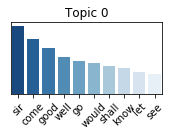

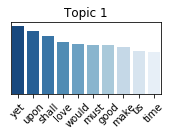

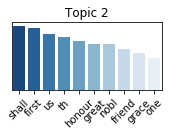

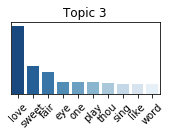

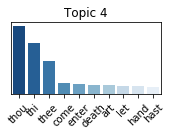

In [76]:
# Plot distribution of probability mass over most common words in each topic

sns.mpl.rc("figure", figsize=(2.5,2))
savebase = "figures/topic_distributions_{}/".format(len(topic_word))

if not os.path.exists(savebase):
    os.makedirs(savebase)

n_plotted = 10

vocab_array = np.array(vocab)

for i, topic_dist in enumerate(topic_word):
    top_words = vocab_array[np.argsort(topic_dist)][:-(n_plotted+1):-1]
    top_probs = topic_dist[np.argsort(topic_dist)][:-(n_plotted+1):-1]
    ax = sns.barplot(x=top_words, y=top_probs, palette="Blues_r")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.get_yaxis().set_visible(False)
    ax.ylabel = "Probability Mass"
    ax.set_title("Topic {}".format(i))
    plt.tight_layout()
    plt.savefig(savebase + "topic_{}.png".format(i))
    plt.show()
    
    

# TODO

## Better preprocessing

* Look for more lines to remove while parsing corpus (e.g. Enter [NAME], ...)
* Downweight words by frequency? tf-idf for example?
* Find better stemmer


## General directions

* Compare stage direction and setting vs. topics from dialogue
